In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("indian_car_sales_large_simulated.xlsx")

In [3]:
df.isna().sum()

Brand         0
Model         0
Year          0
Units_Sold    0
Revenue       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       120 non-null    object 
 1   Model       120 non-null    object 
 2   Year        120 non-null    int64  
 3   Units_Sold  120 non-null    int64  
 4   Revenue     120 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


In [5]:
df.describe()

,Year,Units_Sold,Revenue
count,120.000000,120.000000,120.000000
mean,2021.400000,58078.725000,13636.128583
std,1.726706,31524.569741,11091.603411
min,2019.000000,10864.000000,1112.000000
25%,2020.000000,33178.250000,5431.692500
50%,2021.000000,56935.500000,9129.645000
75%,2023.000000,86283.500000,19856.440000
max,2024.000000,116157.000000,46462.800000


In [6]:
df['Revenue_per_Unit']= (df["Revenue"]*100)/df['Units_Sold']

In [7]:
df.head()

,Brand,Model,Year,Units_Sold,Revenue,Revenue_per_Unit
0,MG Motor India,Astor,2019,61935,9909.60,16.0
1,Maruti Suzuki,Brezza,2021,66716,6671.60,10.0
2,Honda Cars India,City,2023,69432,14580.72,21.0
3,Tata Motors,Safari,2020,23277,4888.17,21.0
4,Tata Motors,Altroz,2021,39494,8688.68,22.0


In [8]:
unit_per_Brand = df.pivot_table(index="Brand" , values='Units_Sold', aggfunc="sum").reset_index()

In [9]:
revenue_per_year = df.pivot_table(index="Year",values="Revenue",aggfunc="sum").reset_index()

In [10]:
avg_rev_per_unit_brand = df.groupby('Brand')['Revenue_per_Unit'].mean()

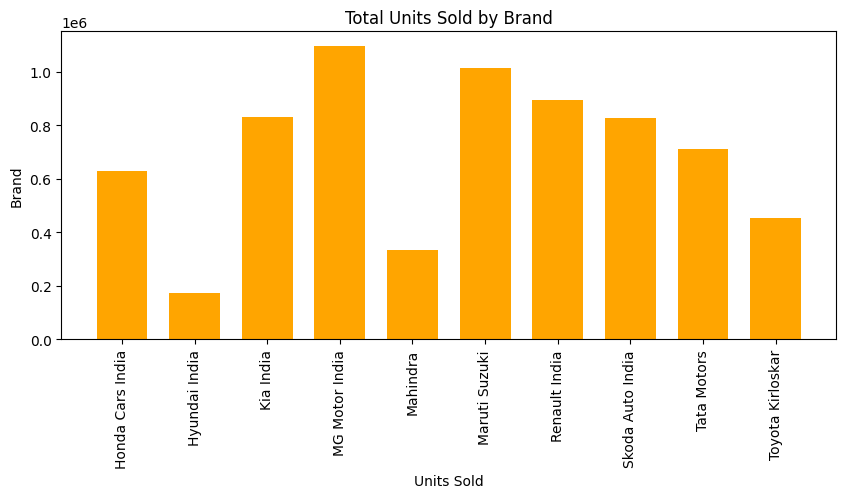

In [11]:
plt.figure(figsize=(10,4))
plt.bar(unit_per_Brand['Brand'],unit_per_Brand['Units_Sold'],width=0.7,color='orange')
plt.xticks(rotation = 90)
plt.title('Total Units Sold by Brand')
plt.xlabel('Units Sold')
plt.ylabel('Brand')
plt.show()

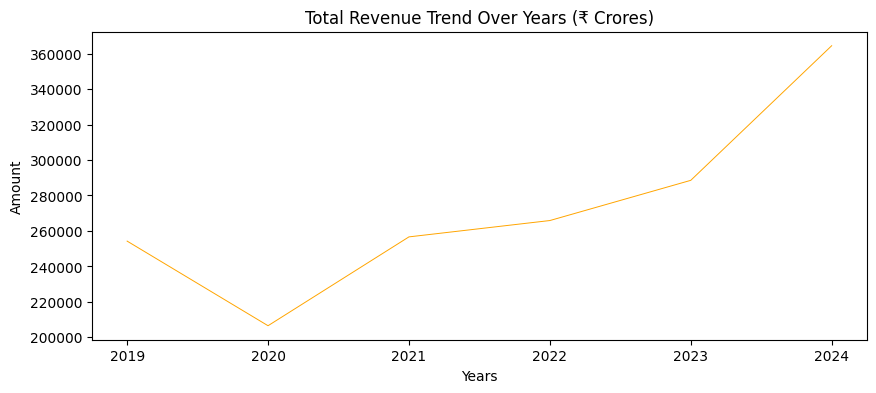

In [12]:
plt.figure(figsize=(10,4))
plt.plot(revenue_per_year['Year'],revenue_per_year['Revenue'],color="orange",linewidth=0.7)
plt.title('Total Revenue Trend Over Years (₹ Crores)')
plt.xlabel("Years")
plt.ylabel("Amount")
plt.show()

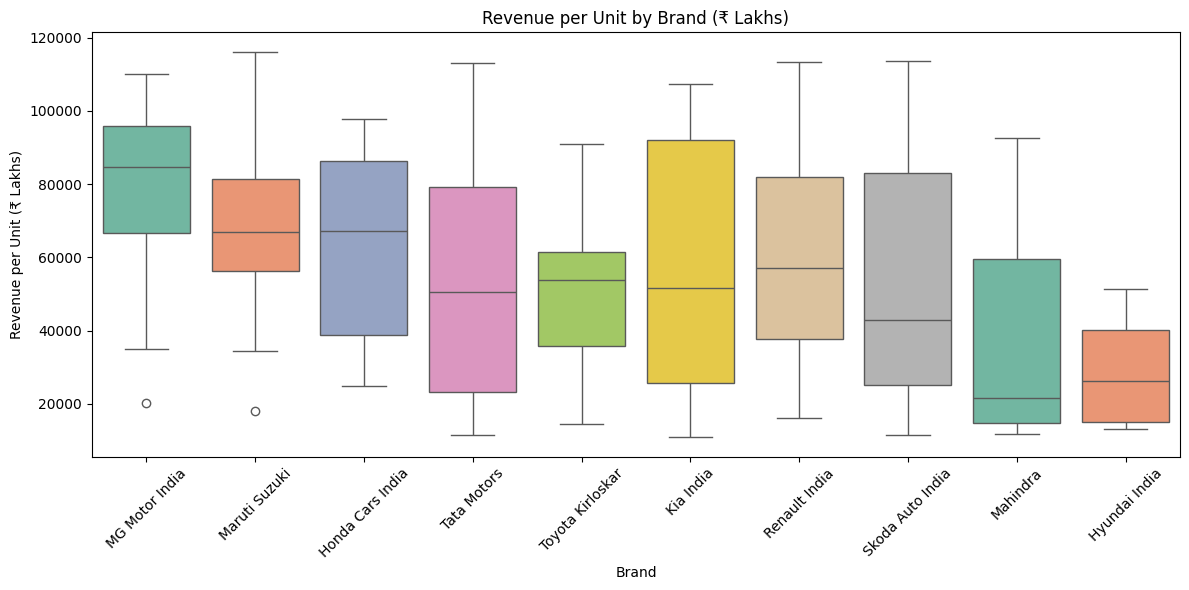

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Brand',y='Units_Sold',palette='Set2')
plt.title('Revenue per Unit by Brand (₹ Lakhs)')
plt.xlabel('Brand')
plt.ylabel('Revenue per Unit (₹ Lakhs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

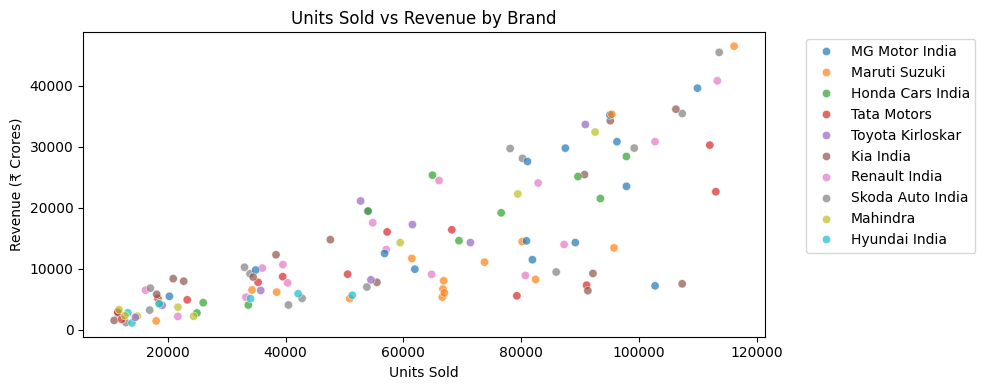

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Units_Sold',y='Revenue',hue='Brand',palette='tab10', alpha=0.7)
plt.title('Units Sold vs Revenue by Brand')
plt.xlabel('Units Sold')
plt.ylabel('Revenue (₹ Crores)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
""""📊 Key Insights from the Data

🔹 1. Total Revenue Over Years:
A clear upward trend in total revenue, with peaks in recent years. This indicates growing consumer demand and stronger sales performance.

🔹 2. Units Sold vs Revenue by Brand:
While most brands show a positive correlation between units sold and revenue, a few brands (e.g., luxury models)
show higher revenue with fewer units sold. This reflects premium positioning.

🔹 3. Revenue per Unit Comparison by Brand:
Some brands, like MG and Toyota, achieve higher revenue per unit (₹ lakhs), reflecting premium pricing,
while brands like Maruti Suzuki maintain lower revenue per unit but dominate in volume sales."""

'"📊 Key Insights from the Data\n\n🔹 1. Total Revenue Over Years:\nA clear upward trend in total revenue, with peaks in recent years. This indicates growing consumer demand and stronger sales performance.\n\n🔹 2. Units Sold vs Revenue by Brand:\nWhile most brands show a positive correlation between units sold and revenue, a few brands (e.g., luxury models)\nshow higher revenue with fewer units sold. This reflects premium positioning.\n\n🔹 3. Revenue per Unit Comparison by Brand:\nSome brands, like MG and Toyota, achieve higher revenue per unit (₹ lakhs), reflecting premium pricing,\nwhile brands like Maruti Suzuki maintain lower revenue per unit but dominate in volume sales.'